## Exercise 1_b
* 312441

In [1]:
# This is required to run everytime because sometimes, 
# without running it it fails to establish connection back to python.
import findspark
import matplotlib.pyplot as plt
findspark.init()
findspark.find()

'C:\\Spark\\spark-3.3.0-bin-hadoop3'

In [2]:
# Required libraries
from pyspark.sql import SparkSession
from pyspark.sql.types import ArrayType, StructField, StructType, StringType, IntegerType, DecimalType
from decimal import Decimal
import pyspark
from pyspark import SparkContext, SparkConf
import numpy as np
import pandas as pd
from pyspark.sql.functions import mean , stddev, col, to_date, date_format
import pyspark.sql.functions as F
from time import strptime
import datetime
from ast import literal_eval
from pyspark.sql import SparkSession

In [3]:
# Initial settings to start the Spark and get its context.
conf = pyspark.SparkConf().setAppName('ex8_1').setMaster('local')
sc = pyspark.SparkContext(conf = conf)
spark = SparkSession(sc)

students_data= sc.textFile('students.json').collect()
df = spark.read.json(sc.parallelize(students_data))
df.show(truncate=False)

+------------------+------------------+----------+---------+------+----+
|course            |dob               |first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|October 14, 1983  |Alan      |Joe      |10    |1   |
|Computer Science  |September 26, 1980|Martin    |Genberg  |17    |2   |
|Graphic Design    |June 12, 1982     |Athur     |Watson   |16    |3   |
|Graphic Design    |April 5, 1987     |Anabelle  |Sanberg  |12    |4   |
|Psychology        |November 1, 1978  |Kira      |Schommer |11    |5   |
|Business          |17 February 1981  |Christian |Kiriam   |10    |6   |
|Machine Learning  |1 January 1984    |Barbara   |Ballard  |14    |7   |
|Deep Learning     |January 13, 1978  |John      |null     |10    |8   |
|Machine Learning  |26 December 1989  |Marcus    |Carson   |15    |9   |
|Physics           |30 December 1987  |Marta     |Brooks   |11    |10  |
|Data Analytics    |June 12, 1975     |Holly     |S

In [4]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col
# 1.
# Here we are just selecting all the points value and then replacing it with mean val via following code 
df_stats = df.select(_mean(col('points')).alias('mean')).collect()
mean = df_stats[0]['mean']
df=df.na.fill(value=mean,subset=["points"])
df.show(truncate=False)

+------------------+------------------+----------+---------+------+----+
|course            |dob               |first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|October 14, 1983  |Alan      |Joe      |10    |1   |
|Computer Science  |September 26, 1980|Martin    |Genberg  |17    |2   |
|Graphic Design    |June 12, 1982     |Athur     |Watson   |16    |3   |
|Graphic Design    |April 5, 1987     |Anabelle  |Sanberg  |12    |4   |
|Psychology        |November 1, 1978  |Kira      |Schommer |11    |5   |
|Business          |17 February 1981  |Christian |Kiriam   |10    |6   |
|Machine Learning  |1 January 1984    |Barbara   |Ballard  |14    |7   |
|Deep Learning     |January 13, 1978  |John      |null     |10    |8   |
|Machine Learning  |26 December 1989  |Marcus    |Carson   |15    |9   |
|Physics           |30 December 1987  |Marta     |Brooks   |11    |10  |
|Data Analytics    |June 12, 1975     |Holly     |S

In [5]:
# 2.
# Simple code which is updating the data by replacing null dob and lastname with "unknown" and - respectively.
df=df.na.fill(value='unknown',subset=["dob"])
df=df.na.fill(value='-',subset=["last_name"])
df.show(truncate=False)

+------------------+------------------+----------+---------+------+----+
|course            |dob               |first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|October 14, 1983  |Alan      |Joe      |10    |1   |
|Computer Science  |September 26, 1980|Martin    |Genberg  |17    |2   |
|Graphic Design    |June 12, 1982     |Athur     |Watson   |16    |3   |
|Graphic Design    |April 5, 1987     |Anabelle  |Sanberg  |12    |4   |
|Psychology        |November 1, 1978  |Kira      |Schommer |11    |5   |
|Business          |17 February 1981  |Christian |Kiriam   |10    |6   |
|Machine Learning  |1 January 1984    |Barbara   |Ballard  |14    |7   |
|Deep Learning     |January 13, 1978  |John      |-        |10    |8   |
|Machine Learning  |26 December 1989  |Marcus    |Carson   |15    |9   |
|Physics           |30 December 1987  |Marta     |Brooks   |11    |10  |
|Data Analytics    |June 12, 1975     |Holly     |S

In [40]:
# 3. 
# Here i define a function which format our date in the required format we do this with help of regex + dictionary
# and update the dobs by invoking this function with date column 
from datetime import datetime
from pyspark.sql.functions import col,udf,unix_timestamp
from pyspark.sql.types import DateType
import re

def dat_e(s):
    s=re.sub('[^A-Za-z0-9/ ]+','', s)
    s=s.split()
    s=[int(element) if element.isdigit() else element for element in s]
    month = {'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07','August':'08','September':'09',
             'October':'10','November':'11','December':'12'}
    if s[0]=="unknown":
        return(s[0])
    else:

        if type(s[0])==str:
            MM=month[s[0]]
        else:
            if type(s[0])==int and s[0]<31:
                DD=s[0]
            else:
                YYYY=s[0]
        if type(s[1])==str:
            MM=month[s[1]]
        else:
            if type(s[1])==int and s[1]<31:
                DD=s[1]
            else:
                YYYY=s[1]
        if type(s[2])==str:
            MM=month[s[2]]
        else:
            if type(s[2])==int and s[2]<31:
                DD=s[0]
            else:
                YYYY=s[2]
        if DD<10:
            DD=str(0)+str(DD)
        return str(str(DD)+"-"+str(MM)+"-"+str(YYYY))        

func =  udf(lambda x: dat_e(x))

df2 = df.withColumn('date', func(col('dob')))
df2 = df2.drop('dob')
df2 = df2.drop('new_date')
df2 = df2.withColumnRenamed('date', 'dob')
df2.show(truncate=True)

+------------------+----------+---------+------+----+----------+
|            course|first_name|last_name|points|s_id|       dob|
+------------------+----------+---------+------+----+----------+
|Humanities and Art|      Alan|      Joe|    10|   1|14-10-1983|
|  Computer Science|    Martin|  Genberg|    17|   2|26-09-1980|
|    Graphic Design|     Athur|   Watson|    16|   3|12-06-1982|
|    Graphic Design|  Anabelle|  Sanberg|    12|   4|05-04-1987|
|        Psychology|      Kira| Schommer|    11|   5|01-11-1978|
|          Business| Christian|   Kiriam|    10|   6|17-02-1981|
|  Machine Learning|   Barbara|  Ballard|    14|   7|01-01-1984|
|     Deep Learning|      John|        -|    10|   8|13-01-1978|
|  Machine Learning|    Marcus|   Carson|    15|   9|26-12-1989|
|           Physics|     Marta|   Brooks|    11|  10|30-12-1987|
|    Data Analytics|     Holly| Schwartz|    12|  11|12-06-1975|
|  Computer Science|     April|    Black|    11|  12|02-07-1985|
|  Computer Science|     

In [42]:
# 4. 
# Here we use the updated data from dob column to generate the age for each student and put them
# in a new column 'age' using following code
from pyspark.sql import functions as F
from pyspark.sql.functions import current_date
from pyspark.sql.functions import *
df3=df2.select(col("dob"),to_date(col("dob"),"dd-MM-yyyy").alias("date_temp"))
df3= df3.withColumn('age', (F.months_between(current_date(), F.col('date_temp')) / 12).cast('int'))
df3 = df3.drop('date_temp')
d3=df3.na.fill(value='unknown',subset=["age"])
df2=df2.join(df3, on=["dob"])
df2.show()

+----------+------------------+----------+---------+------+----+----+
|       dob|            course|first_name|last_name|points|s_id| age|
+----------+------------------+----------+---------+------+----+----+
|01-01-1984|  Machine Learning|   Barbara|  Ballard|    14|   7|  38|
|01-11-1978|        Psychology|      Kira| Schommer|    11|   5|  43|
|02-06-1985|    Data Analytics|   Zachary|        -|    10|  20|  37|
|02-07-1985|  Computer Science|     April|    Black|    11|  12|  37|
|05-04-1987|    Graphic Design|  Anabelle|  Sanberg|    12|   4|  35|
|07-02-1986|        Psychology|      Mark|    Weber|    12|  14|  36|
|07-03-1980|          Business|   Darlene|    Mills|    19|  19|  42|
|10-08-1984|          Business|    Martin|   Steele|     7|  16|  37|
|12-06-1975|    Data Analytics|     Holly| Schwartz|    12|  11|  47|
|12-06-1982|    Graphic Design|     Athur|   Watson|    16|   3|  40|
|13-01-1978|     Deep Learning|      John|        -|    10|   8|  44|
|14-10-1983|Humaniti

In [45]:
# 5.
# Here we are reward extra points to students according to given criteria in the question.
# by conditioning on the standard deviation using following code
from pyspark.sql.functions import when
df_stats1 = df.select(_stddev(col('points')).alias('std'),_mean(col('points')).alias('mean')).collect()
std = df_stats1[0]['std']
mean = df_stats[0]['mean']
std_dev1=std+mean
df2 = df2.withColumn("points", when(df2.points>std_dev1,20).otherwise(df2.points))
df2.show(truncate=False)

+----------+------------------+----------+---------+------+----+----+
|dob       |course            |first_name|last_name|points|s_id|age |
+----------+------------------+----------+---------+------+----+----+
|01-01-1984|Machine Learning  |Barbara   |Ballard  |14    |7   |38  |
|01-11-1978|Psychology        |Kira      |Schommer |11    |5   |43  |
|02-06-1985|Data Analytics    |Zachary   |-        |10    |20  |37  |
|02-07-1985|Computer Science  |April     |Black    |11    |12  |37  |
|05-04-1987|Graphic Design    |Anabelle  |Sanberg  |12    |4   |35  |
|07-02-1986|Psychology        |Mark      |Weber    |12    |14  |36  |
|07-03-1980|Business          |Darlene   |Mills    |20    |19  |42  |
|10-08-1984|Business          |Martin    |Steele   |7     |16  |37  |
|12-06-1975|Data Analytics    |Holly     |Schwartz |12    |11  |47  |
|12-06-1982|Graphic Design    |Athur     |Watson   |20    |3   |40  |
|13-01-1978|Deep Learning     |John      |-        |10    |8   |44  |
|14-10-1983|Humaniti

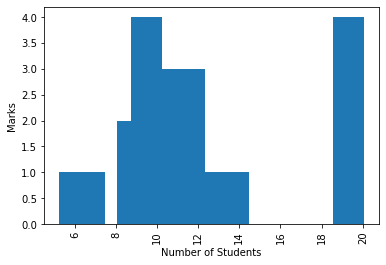

In [46]:
# 6. 
# In this final part we just use the points column to plot our histogran like we did in intial exercises  
import pandas as pd
import matplotlib.pyplot as plt
_histogram = df2.select('points').rdd.flatMap(lambda x: x).histogram(20)
y = _histogram[1]
x=_histogram[0]
x=x[:-1]
fig = plt.figure()
plt.xticks(rotation='vertical')
plt.bar(x,y, width=1.5)
plt.xlabel('Number of Students')
plt.ylabel('Marks')
plt.show()